k近傍法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1
    x_train = np.concatenate([x0, x1]) # 結合
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train

[[-1.23607839 -2.62292434]
 [-0.88609155 -0.58876556]
 [-1.54703347 -1.64077641]
 [-1.25391902 -0.54955311]
 [-1.41686532 -1.27936953]
 [-0.4673434  -1.45307768]
 [-1.4533601  -0.6026721 ]
 [-1.10174449 -2.8234118 ]
 [-0.58388107 -1.73151297]
 [-1.93310562 -0.67194351]]
[0 0 0 0 0 0 0 0 0 0]


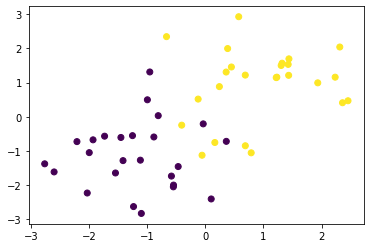

In [14]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)
print(X_train[:10])
print(ys_train[:10])

In [15]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

def knc_predict(n_neighbors, x_train, y_train, X_test):
    y_pred = np.empty(len(X_test), dtype=y_train.dtype)
    for i, x in enumerate(X_test):
        distances = distance(x, X_train)
        # 各行・各列の値を別々に昇順にソート
        nearest_index = distances.argsort()[:n_neighbors]
        # 最頻値を求め、クラスタリング
        mode, _ = stats.mode(y_train[nearest_index])
        y_pred[i] = mode
    return y_pred

def plt_resut(x_train, y_train, y_pred):
    xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    xx = np.array([xx0, xx1]).reshape(2, -1).T
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))

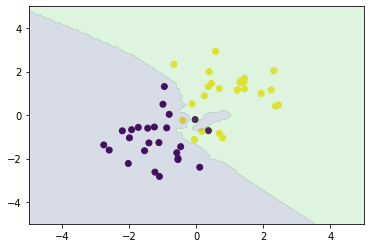

In [16]:
n_neighbors = 3

# プロット用
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

k-means

In [17]:
def gen_data2():
    x1 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    x2 = np.random.normal(size=(100, 2)) + np.array([5, -5])
    x3 = np.random.normal(size=(100, 2)) + np.array([0, 5])
    return np.vstack((x1, x2, x3))

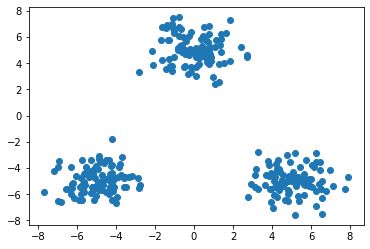

In [18]:
#データ作成
X_train = gen_data2()
#データ描画
plt.scatter(X_train[:, 0], X_train[:, 1])

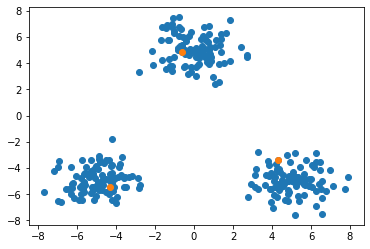

In [49]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

n_clusters = 3

# 各クラスタ中心をランダムに初期化
centers = X_train[np.random.choice(len(X_train), n_clusters, replace=False)]
# 初期値データ描画
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_train[:, 0], X_train[:, 1])
ax.scatter(centers.T[0], centers.T[1])


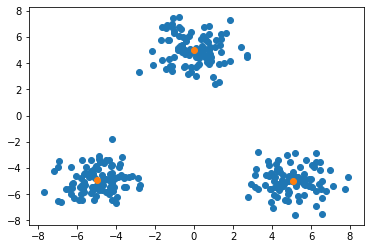

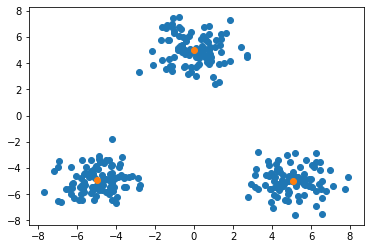

In [50]:
iter_max = 3

for _ in range(iter_max):
    prev_centers = np.copy(centers)
    D = np.zeros((len(X_train), n_clusters))
    # 各データ点に対して、各クラスタ中心との距離を計算
    for i, x in enumerate(X_train):
        D[i] = distance(x, centers)
    # 各データ点に、最も距離が近いクラスタを割り当
    cluster_index = np.argmin(D, axis=1)
    # 各クラスタの中心を計算
    for k in range(n_clusters):
        index_k = cluster_index == k
        centers[k] = np.mean(X_train[index_k], axis=0)
    
    # 学習過程もプロット
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_train[:, 0], X_train[:, 1])
    ax.scatter(centers[:, 0], centers[:, 1])
#     ax.scatter(centers.T[0], centers.T[1])
    
    # 収束判定
    if np.allclose(prev_centers, centers):
        break

In [51]:
def plt_result(X_train, centers, xx):
    #　データを可視化
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, cmap='spring')
    # 中心を可視化
    plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', lw=2, c='black', edgecolor="white")
    # 領域の可視化
    pred = np.empty(len(xx), dtype=int)
    for i, x in enumerate(xx):
        d = distance(x, centers)
        pred[i] = np.argmin(d)
    plt.contourf(xx0, xx1, pred.reshape(100, 100), alpha=0.2, cmap='spring')

In [52]:
y_pred = np.empty(len(X_train), dtype=int)
for i, x in enumerate(X_train):
    d = distance(x, centers)
    y_pred[i] = np.argmin(d)

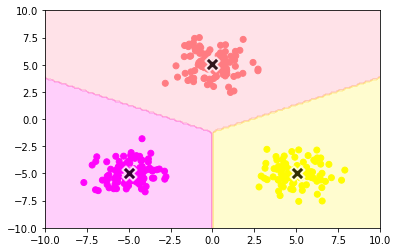

In [53]:
xx0, xx1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

plt_result(X_train, centers, xx)